<a href="https://colab.research.google.com/github/hugoalexg/Python-for-Data-Science-and-Machine-Learning-Bootcamp/blob/main/21_Neural_Nets_and_Deep_Learning_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Keras Syntax Basics**

With TensorFlow 2.0 , Keras is now the main API choice. Let's work through a simple regression project to understand the basics of the Keras syntax and adding layers.


**The Data**

To learn the basic syntax of Keras, we will use a very simple fake data set, in the subsequent lectures we will focus on real datasets, along with feature engineering! For now, let's focus on the syntax of TensorFlow 2.0.

Let's pretend this data are measurements of some rare gem stones, with 2 measurement features and a sale price. Our final goal would be to try to predict the sale price of a new gem stone we just mined from the ground, in order to try to set a fair price in the market.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/My Drive/Python for Data Science and Machine Learning Bootcamp/Files/fake_reg.csv")

In [ ]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


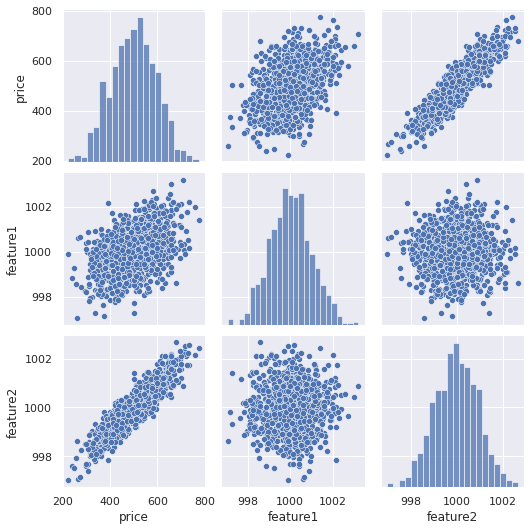

In [ ]:
sns.pairplot(df)

**Test/Train Split**


In [ ]:
from sklearn.model_selection import train_test_split

X = df[['feature1','feature2']].values
y = df['price'].values
# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

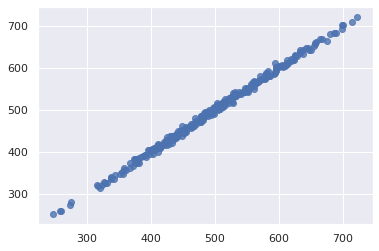

In [ ]:
#fazendo um teste com o algoritmo regressão linear antes, apenas para comparar (não faz parte do exercicio!)
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
sns.regplot(x=y_test, y=predictions, fit_reg=False)
plt.ticklabel_format(style='plain')
plt.show()

In [ ]:
#verificando os erros com regressão linear (não faz parte do exercicio!)
from sklearn import metrics

print('MAE: ' + str(metrics.mean_absolute_error(y_test, predictions)))
print('MSE: ' + str(metrics.mean_squared_error(y_test, predictions)))
print('RMSE: ' + str(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

MAE: 4.022117726490923
MSE: 25.139165929445127
RMSE: 5.013897279506744


**Normalizing/Scaling the Data**


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**TensorFlow 2.0 Syntax**


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

Model - as a list of layers


In [ ]:
model = Sequential()

#criando 3 camadas de neurônios: a primeira com 4, a segunda com 8, e a terceira com 4 neurônios. 
#Todos conectados com todos da camada seguinte (Dense). 
#função de ativaçao: "ReLU"
model.add(Dense(4,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))

# Criando a camada de saida, com apenas 1 neurônio
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

Choosing an optimizer and loss
Keep in mind what kind of problem you are trying to solve:
- For a multi-class classification problem

              model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

- For a binary classification problem

              model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

- For a mean squared error regression problem

              model.compile(optimizer='rmsprop',
              loss='mse')

**Training**

In [ ]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 1s 1ms/step - loss: 254995.5951
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 261314.9395
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 252630.7262
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 259908.7024
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 256714.8152
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 248766.4395
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 257281.1345
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 256662.7391
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 254756.9049
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 251330.6379
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 250938.7894
Epoch 12/250
22/22 [==============================] - 0s 1ms/st

**Evaluation**

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.

Text(0.5, 1.0, 'Training Loss per Epoch')

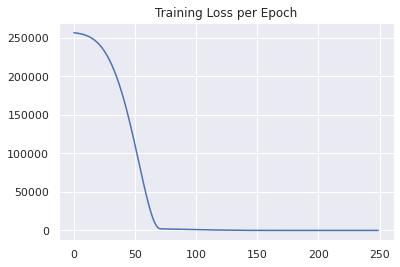

In [ ]:
loss = model.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch")

Compare final evaluation (MSE) on training set and test set.


In [ ]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [ ]:
training_score

23.894237518310547

In [ ]:
test_score

24.880157470703125

In [ ]:
#fazendo as previsões
test_predictions = model.predict(X_test)

In [ ]:
#criando dataframe para comparação
pred_df = pd.DataFrame({'Test Y': y_test ,'Model Predictions': test_predictions.reshape(300,)})

In [ ]:
pred_df.head()

,Test Y,Model Predictions
0,402.296319,405.176697
1,624.156198,623.482605
2,582.455066,592.061707
3,578.588606,572.167297
4,371.224104,366.515259


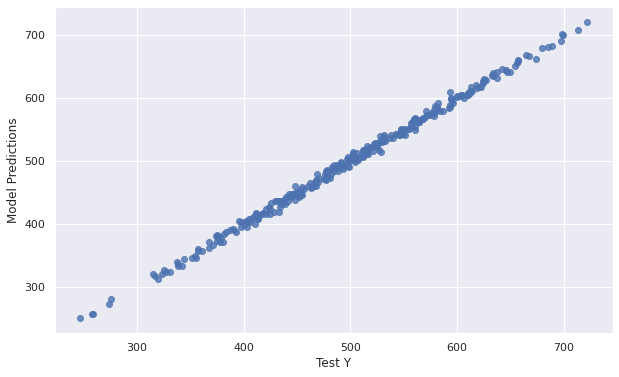

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x='Test Y', y='Model Predictions', data=pred_df, fit_reg=False)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


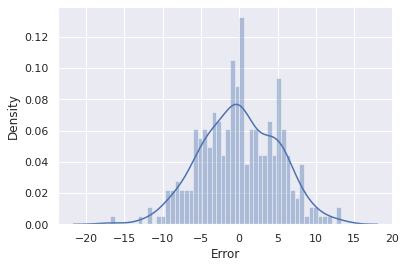

In [ ]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']
sns.distplot(pred_df['Error'],bins=50)
plt.ticklabel_format(style='plain')
plt.show()

In [ ]:
print('MAE: ' + str(metrics.mean_absolute_error(pred_df['Test Y'], pred_df['Model Predictions'])))
print('MSE: ' + str(metrics.mean_squared_error(pred_df['Test Y'], pred_df['Model Predictions'])))
print('RMSE: ' + str(np.sqrt(metrics.mean_squared_error(pred_df['Test Y'], pred_df['Model Predictions']))))

MAE: 3.9961544283104757
MSE: 24.880156604944485
RMSE: 4.988001263526753


**Predicting on brand new data**


In [ ]:
new_gem = [[998,1000]]
new_gem = scaler.transform(new_gem)
model.predict(new_gem)

array([[419.59744]], dtype=float32)

**Saving and Loading a Model**


In [ ]:
from tensorflow.keras.models import load_model

model.save('/content/drive/My Drive/Python for Data Science and Machine Learning Bootcamp/Files/my_model.h5')
later_model = load_model('/content/drive/My Drive/Python for Data Science and Machine Learning Bootcamp/Files/my_model.h5')
later_model.predict(new_gem)

array([[419.59744]], dtype=float32)